In [109]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
import numpy as np
from functools import partial
from pareto import pareto, ParetoResults
from promethee import *
from electre import *

In [111]:
labels = list("ABCDE")
values = np.array([
    (10, 1400),
    (9, 1700),
    (8, 1500),
    (7.5, 2000),
    (6, 1900)
], dtype=np.int32)

print(pareto(values, [-1, -1]).repr_labelled(labels))

optimal:            A, C, E
weakly dominated:   ∅
strongly dominated: B, D


In [112]:
labels = list("ABCDE")
values = np.array([
    (8, 5),
    (9, 2),
    (12, 1),
    (13, 2),
    (16, 2)
], dtype=np.int32)

print(pareto(values, [1, -1]).repr_labelled(labels))

optimal:            C, E
weakly dominated:   D
strongly dominated: A, B


In [113]:
labels = list("ABCDEF")
values = np.array([
    (2, 78, 700),
    (1, 82, 1200),
    (1, 50, 250),
    (3, 150, 200),
    (3, 170, 450),
    (2, 65, 500)
], dtype=np.int32)

print(pareto(values, [1, -1, -1]).repr_labelled(labels))

optimal:            C, D, F
weakly dominated:   A, E
strongly dominated: B


# TD2

In [114]:
def mask_columns(values, norm_mul, cols):
    cols = np.array(cols)
    return values[:, cols], norm_mul[cols]

In [115]:
labels = [f"A{i+1}" for i in range(6)]
values = np.array([
    (80, 90, 600, 5.4, 8, 5),
    (65, 58, 200, 9.7, 1, 1),
    (83, 60, 400, 7.2, 4, 7),
    (40, 80, 1000, 7.5, 7, 10),
    (52, 72, 600, 2.0, 3, 8),
    (94, 96, 700, 3.6, 5, 6)
])
norm_mul = np.array([-1, 1, -1, -1, -1, 1])

for indices in [1, 5], [0, 1, 5], [0, 1, 3, 5]:
    print(f"With columns {', '.join(f'C{i+1}' for i in indices)}")
    print(pareto(*mask_columns(values, norm_mul, indices)).repr_labelled(labels))
    print()

With columns C2, C6
optimal:            A4, A6
weakly dominated:   ∅
strongly dominated: A1, A2, A3, A5

With columns C1, C2, C6
optimal:            A1, A4, A6
weakly dominated:   ∅
strongly dominated: A2, A3, A5

With columns C1, C2, C4, C6
optimal:            A1, A4, A5, A6
weakly dominated:   ∅
strongly dominated: A2, A3



In [116]:
print(promethee(values, norm_mul, np.array([0.1, 0.2, 0.2, 0.1, 0.2, 0.2])).repr_labelled(labels))

ϕ+: [0.38 0.46 0.5  0.48 0.66 0.48]
ϕ-: [0.58 0.54 0.5  0.52 0.3  0.52]
ϕ*: [-0.2  -0.08  0.   -0.04  0.36 -0.04]

by ϕ+: A1 < A2 < A4 <= A6 < A3 < A5
by ϕ-: A1 < A2 < A6 <= A4 < A3 < A5
by ϕ*: A1 < A2 < A6 <= A4 < A3 < A5

scores:
[[0.  0.5 0.4 0.5 0.2 0.3]
 [0.5 0.  0.5 0.4 0.4 0.5]
 [0.6 0.5 0.  0.5 0.2 0.7]
 [0.5 0.6 0.5 0.  0.5 0.3]
 [0.6 0.6 0.8 0.5 0.  0.8]
 [0.7 0.5 0.3 0.7 0.2 0. ]]


In [117]:
step_fn = make_promethee_linear_step(np.array([20, 10, 200, 4, 2, 2]))
print(promethee(values, norm_mul, np.array([0.1, 0.2, 0.2, 0.1, 0.2, 0.2]), step_fn).repr_labelled(labels))

ϕ+: [0.3165 0.453  0.393  0.435  0.578  0.4305]
ϕ-: [0.505  0.4845 0.428  0.4915 0.284  0.413 ]
ϕ*: [-0.1885 -0.0315 -0.035  -0.0565  0.294   0.0175]

by ϕ+: A1 < A3 < A6 < A4 < A2 < A5
by ϕ-: A1 < A4 < A2 < A3 < A6 < A5
by ϕ*: A1 < A4 < A3 < A2 < A6 < A5

scores:
[[0.     0.5    0.26   0.4525 0.2    0.17  ]
 [0.475  0.     0.49   0.4    0.4    0.5   ]
 [0.6    0.3025 0.     0.4075 0.2    0.455 ]
 [0.4    0.555  0.5    0.     0.42   0.3   ]
 [0.585  0.565  0.6    0.5    0.     0.64  ]
 [0.465  0.5    0.29   0.6975 0.2    0.    ]]


s=0.50: A2<-A3, A4<-A3, A1<-A4, A5<-A4, A1<-A5, A2<-A5, A3<-A5, A4<-A5, A6<-A5, A1<-A6, A2<-A6
s=0.52: A1<-A5, A2<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.54: A1<-A5, A2<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.56: A1<-A5, A2<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.58: A1<-A5, A2<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.60: A1<-A5, A2<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.62: A1<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.64: A1<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.66: A1<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.68: A1<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.70: A1<-A5, A3<-A5, A6<-A5
s=0.72: A1<-A5, A3<-A5, A6<-A5
s=0.74: A1<-A5, A3<-A5, A6<-A5
s=0.76: A1<-A5, A3<-A5, A6<-A5
s=0.78: A1<-A5, A3<-A5, A6<-A5
s=0.80: 
s=0.82: 
s=0.84: 
s=0.86: 
s=0.88: 
s=0.90: 
s=0.92: 
s=0.94: 
s=0.96: 
s=0.98: 
kernel: [('A5', 'A1'), ('A5', 'A2'), ('A5', 'A3'), ('A5', 'A6'), ('A6', 'A1')]
score_table:
[[0.  0.5 0.4 0.5 0.4 0.3]
 [0.5 0.  0.5 0.4 0.4 0.5]
 [0.6 0.5 0.  0.5 0.2 0.7]
 [0.5 0.6 0.5 0.  0.5 0.3]
 [0.8 0.6 0.8 0.5 0.  0.8]
 [0.7 0.5 0.3 0.7 0.2 0. ]]
non_veto_table

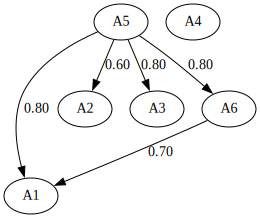

In [118]:
electre_results = electre(
    values,
    norm_mul,
    np.array([0.1, 0.2, 0.2, 0.1, 0.2, 0.2]),
    electre_binary_step,
    0.6,
    np.array([45, 29, 550, 6, 4.5, 4.5])
)

print(electre_results.repr_labelled(labels))
electre_results.graph

s=0.50: A6<-A1, A2<-A3, A4<-A3, A1<-A4, A5<-A4, A1<-A5, A2<-A5, A3<-A5, A4<-A5, A6<-A5, A1<-A6, A2<-A6, A3<-A6
s=0.52: A6<-A1, A1<-A4, A1<-A5, A2<-A5, A3<-A5, A4<-A5, A6<-A5, A1<-A6, A3<-A6
s=0.54: A1<-A4, A1<-A5, A2<-A5, A3<-A5, A4<-A5, A6<-A5, A1<-A6, A3<-A6
s=0.56: A1<-A5, A2<-A5, A3<-A5, A4<-A5, A6<-A5, A1<-A6
s=0.58: A1<-A5, A2<-A5, A3<-A5, A4<-A5, A6<-A5, A1<-A6
s=0.60: A1<-A5, A2<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.62: A1<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.64: A1<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.66: A1<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.68: A1<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.70: A1<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.72: A1<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.74: A1<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.76: A1<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.78: A1<-A5, A3<-A5, A6<-A5, A1<-A6
s=0.80: A1<-A6
s=0.82: A1<-A6
s=0.84: 
s=0.86: 
s=0.88: 
s=0.90: 
s=0.92: 
s=0.94: 
s=0.96: 
s=0.98: 
kernel: [('A5', 'A1'), ('A5', 'A2'), ('A5', 'A3'), ('A5', 'A6'), ('A6', 'A1')]
score_table:
[[0.     0.525  0.4    0.6    0.415  

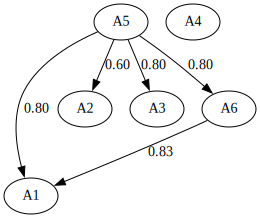

In [121]:
electre_results = electre(
    values,
    norm_mul,
    np.array([0.1, 0.2, 0.2, 0.1, 0.2, 0.2]),
    make_electre_linear_step(np.array([20, 10, 200, 4, 2, 2])),
    0.6,
    np.array([45, 29, 550, 6, 4.5, 4.5])
)

print(electre_results.repr_labelled(labels))
electre_results.graph